# Data Wrangling Template

In [1]:
import pandas as pd
import requests
import os
import tweepy
import json
import re
from matplotlib import pyplot as plt

## Gather

* download twitter-archive-enhanced.csv manually --> Done
* download https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv programmatically --> Done
* Accessing data from twitter API -->

In [2]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [3]:
#get the name of the file from url
file_name=url.split("/")[-1]
file_name

'image-predictions.tsv'

In [4]:
#use requests library to access the link in order to download it
response=requests.get(url)
response

<Response [200]>

In [5]:
#writing the content of the response to a file
if not os.path.isfile(file_name):
    with open (file_name,'wb') as file:
        file.write(response.content)

In [6]:
#reading files
archive_df=pd.read_csv('twitter-archive-enhanced.csv')
images=pd.read_csv('image-predictions.tsv',sep='\t')

In [7]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [9]:
#accessing API
consumer_key='xxxxxxxxxxxxxxxxxxx'
consumer_secret='xxxxxxxxxxxxxxxxxxx'
access_token='xxxxxxxxxxxxxxxxxxx'
access_secret='xxxxxxxxxxxxxxxxxxx'

In [10]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api=tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [11]:
#testing to see if api accessed and working correctly
exp_tweet = api.get_status(archive_df.tweet_id[1000], tweet_mode = 'extended')
content = exp_tweet._json
content

TweepError: [{'code': 89, 'message': 'Invalid or expired token.'}]

In [ ]:
#getting the tweets data using their id,the errors list is to catch any tweet that can't be found
errors = []
if not os.path.isfile('tweet_json.txt'):
    # create the file and write on it
    with open ('tweet_json.txt', 'w') as file:
        for tweet_id in archive_df['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)

In [ ]:
errors

In [12]:
tweets_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        tweets_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
tweet_df=pd.DataFrame(tweets_list)
tweet_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7456,35326
1,892177421306343426,5534,30572
2,891815181378084864,3660,23005
3,891689557279858688,7626,38617
4,891327558926688256,8227,36894
...,...,...,...
2326,666049248165822465,39,95
2327,666044226329800704,124,263
2328,666033412701032449,39,108
2329,666029285002620928,41,118


## Assess

In [13]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [14]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [15]:
tweet_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7456,35326
1,892177421306343426,5534,30572
2,891815181378084864,3660,23005
3,891689557279858688,7626,38617
4,891327558926688256,8227,36894
...,...,...,...
2326,666049248165822465,39,95
2327,666044226329800704,124,263
2328,666033412701032449,39,108
2329,666029285002620928,41,118


In [16]:
#assessing archive df
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [18]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
archive_df['rating_denominator'].max()

170

In [20]:
archive_df['expanded_urls'].sample()

1979    https://twitter.com/dog_rates/status/672980819...
Name: expanded_urls, dtype: object

In [21]:
sum(archive_df['expanded_urls'].duplicated())

137

In [22]:
sum(archive_df.duplicated())

0

In [23]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [24]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
sum(images.duplicated())

0

In [27]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
images['img_num'].unique()

array([1, 4, 2, 3], dtype=int64)

In [29]:
images['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [30]:
images[images['img_num']==4].sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1549,792913359805018113,https://pbs.twimg.com/media/CwD-eCLWIAA6v0B.jpg,4,web_site,0.226716,False,lighter,0.081941,False,switch,0.039009,False


In [31]:
archive_df.shape

(2356, 17)

In [32]:
images.shape

(2075, 12)

In [33]:
images.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [34]:
archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [35]:
archive_df['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
            ... 
Kathmandu      1
Stewie         1
Mac            1
Roscoe         1
Humphrey       1
Name: name, Length: 957, dtype: int64

In [36]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


# issues in archive_df
### Quality
- timestamp not in time date format
- some tweets doesn't have an image
- some tweets are replys
- some tweets are retweets not the original one
- tweet id should be string not int
- doggo	floofer	pupper	puppo columns has none instead of being empty
- convert rating columns to float
- extract ratings correctly from text
- name column contains invalid names(a,an,..etc)
### Tidiness
- dog stage is divided into 4 columns
- timestamp column contains 2 different data (date and time)
- after removing retweets and replys the columns related to them are no longer needed

# issues in images
### Quality
- tweet id should be string not int
- need to check if all tweets in file are orignial tweets or some are retweets and replys
### Tidiness
- column headers should be changed to a more describtive headers
- merge with the archive df


# issues in tweet df
### Quality
- tweet_id should be string not int
### Tidniess
- retweets count and favourite count can be added as 2 columns in the archive DF

## Clean

In [217]:
#make copies of DF to clean
archive_df_clean=archive_df.copy()
images_clean=images.copy()
tweet_df_clean=tweet_df.copy()

#### Define
###### Archive DF
1- convert time stamp column into date time format

#### Code

In [218]:
archive_df_clean['timestamp']=archive_df_clean.timestamp.astype('datetime64[ns]')

#### Test

In [219]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

#### Define

###### Archive DF
2- Remove tweets that doesn't have an image using the image prediction file with the tweets id in it

#### Code

In [220]:
# creating a list of tweet_ids with images "tweets_with_image" and confirming its length
tweets_with_image = list(images_clean.tweet_id.unique())
len(tweets_with_image)

2075

In [221]:
# confirming that all the tweets with images exist in the archive dataset
len(tweets_with_image) == archive_df_clean.tweet_id.isin(tweets_with_image).sum()


True

In [222]:
# Cleaning--leaving only tweets with ids exisiting in the images file
archive_df_clean = archive_df_clean[archive_df_clean.tweet_id.isin(tweets_with_image)]

#### Test

In [223]:
archive_df_clean.shape

(2075, 17)

#### Define
###### Archive DF
3-Remove tweets that are replys using in_reply_to_status_id column as guide

#### Code

In [224]:
replys_tweets=archive_df_clean.in_reply_to_status_id.notnull()
archive_df_clean=archive_df_clean[~replys_tweets]

#### Test

In [225]:
archive_df_clean.in_reply_to_status_id.value_counts()

Series([], Name: in_reply_to_status_id, dtype: int64)

#### Define
###### Archive DF
4- Remove tweets that are retweets using retweeted_status_id column as guide

#### Code

In [226]:
retweets_tweets=archive_df_clean.retweeted_status_id.notnull()
archive_df_clean=archive_df_clean[~retweets_tweets]

#### Test

In [227]:
archive_df_clean.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

#### Define
###### Archive DF
5- Convert Tweet ID to string using astype method

In [228]:
archive_df_clean['tweet_id']=archive_df_clean['tweet_id'].astype(str)

#### Test

In [229]:
archive_df_clean.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

In [230]:
archive_df_clean.shape

(1971, 17)

#### Define
##### Archive DF
6- Replace None with empty string in doggo	floofer	pupper	puppo columns

In [231]:
archive_df_clean['doggo']=archive_df_clean['doggo'].str.replace('None','')
archive_df_clean['floofer']=archive_df_clean['floofer'].str.replace('None','')
archive_df_clean['pupper']=archive_df_clean['pupper'].str.replace('None','')
archive_df_clean['puppo']=archive_df_clean['puppo'].str.replace('None','')

#### Test

In [232]:
for i,value in enumerate(archive_df_clean.columns):
    print(i,value)

0 tweet_id
1 in_reply_to_status_id
2 in_reply_to_user_id
3 timestamp
4 source
5 text
6 retweeted_status_id
7 retweeted_status_user_id
8 retweeted_status_timestamp
9 expanded_urls
10 rating_numerator
11 rating_denominator
12 name
13 doggo
14 floofer
15 pupper
16 puppo


In [233]:
archive_df_clean.doggo.value_counts()

         1898
doggo      73
Name: doggo, dtype: int64

In [234]:
archive_df_clean.floofer.value_counts()

           1963
floofer       8
Name: floofer, dtype: int64

In [235]:
archive_df_clean.pupper.value_counts()

          1762
pupper     209
Name: pupper, dtype: int64

In [236]:
archive_df_clean.puppo.value_counts()

         1948
puppo      23
Name: puppo, dtype: int64

#### Define
##### Archive DF
7- Convert dog stage from being in 4 columns to a single one by adding all them to a new column then drop the old ones

In [237]:
archive_df_clean['dog_stage']=archive_df_clean['doggo']+archive_df_clean['floofer']+archive_df_clean['pupper']+archive_df_clean['puppo']
archive_df_clean.drop('doggo',axis=1,inplace=True)
archive_df_clean.drop('floofer',axis=1,inplace=True)
archive_df_clean.drop('pupper',axis=1,inplace=True)
archive_df_clean.drop('puppo',axis=1,inplace=True)

In [238]:
archive_df_clean.dog_stage.value_counts()

                1668
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [239]:
archive_df_clean.dog_stage.replace('doggopupper','doggo,pupper',inplace=True)
archive_df_clean.dog_stage.replace('doggopuppo','doggo,puppo',inplace=True)
archive_df_clean.dog_stage.replace('doggofloofer','doggo,floofer',inplace=True)



#### Test

In [240]:
archive_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,


In [241]:
archive_df_clean.dog_stage.value_counts()

                 1668
pupper            201
doggo              63
puppo              22
doggo,pupper        8
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

#### Define
#### images DF
8- Convert tweet ID column to string

#### Code

In [242]:
images_clean['tweet_id']=images_clean['tweet_id'].astype(str)

#### Test

In [243]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define
##### images DF
9- remove tweets that are not original tweets using the archive df after cleaning

#### Code

In [244]:
original_tweets=list(archive_df_clean.tweet_id.unique())
len(original_tweets)

1971

In [245]:
images_clean=images_clean[images_clean.tweet_id.isin(original_tweets)]

#### Test

In [246]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   object 
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 159.8+ KB


In [247]:
images_clean.tweet_id.isin(original_tweets).value_counts()

True    1971
Name: tweet_id, dtype: int64

#### Define
##### images df
10- Change the column headers to a more descriptive names

#### Code

In [248]:
images_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [249]:
new_labels={'tweet_id':'tweet_id', 'jpg_url':'Image_URL', 'img_num':'img_num', 
            'p1':'Prediction_1', 'p1_conf':'prediction_1_confidence', 'p1_dog':'prediciton_1_a dog?',
            'p2':'Prediction_2','p2_conf':'prediction_2_confidence', 'p2_dog':'prediciton_2_a dog?',
            'p3':'Prediction_3', 'p3_conf':'prediction_3_confidence', 'p3_dog':'prediciton_3_a dog?'}

In [250]:
images_clean.rename(columns=new_labels,inplace=True)

#### Test

In [251]:
images_clean.columns

Index(['tweet_id', 'Image_URL', 'img_num', 'Prediction_1',
       'prediction_1_confidence', 'prediciton_1_a dog?', 'Prediction_2',
       'prediction_2_confidence', 'prediciton_2_a dog?', 'Prediction_3',
       'prediction_3_confidence', 'prediciton_3_a dog?'],
      dtype='object')

## Define
##### tweet_df
11- Convert tweet_id from it to string

#### Code

In [252]:
tweet_df_clean.tweet_id=tweet_df_clean.tweet_id.astype('str')

#### Test

In [253]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   int64 
 2   favorite_count  2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


#### Define
##### tweet_df
12- merge data from tweet df to the archive df using merge function

#### Code

In [254]:
archive_df_clean=archive_df_clean.merge(tweet_df_clean,how='left',on='tweet_id')

#### Test

In [255]:
archive_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'retweet_count',
       'favorite_count'],
      dtype='object')

#### Define
##### Archive DF
13- Drop retweet related columns and reply related columns

##### Code

In [256]:
archive_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'retweet_count',
       'favorite_count'],
      dtype='object')

In [257]:
archive_df_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)

#### Test

In [258]:
archive_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'retweet_count', 'favorite_count'],
      dtype='object')

#### Define
##### Archive DF
14- convert the single column of date and time to 2 columns 1 for date and 1 for time

#### Code

In [259]:
archive_df_clean['Date'] = archive_df_clean['timestamp'].dt.date
archive_df_clean['Time'] = archive_df_clean['timestamp'].dt.time
#drop the time stampl column
archive_df_clean.drop('timestamp',axis=1,inplace=True)

#### Test

In [260]:
archive_df_clean.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'retweet_count',
       'favorite_count', 'Date', 'Time'],
      dtype='object')

In [261]:
archive_df_clean['Date'].sample()

9    2017-07-26
Name: Date, dtype: object

In [262]:
archive_df_clean['Time'].sample()

1418    18:29:07
Name: Time, dtype: object

#### Define
#### Archive DF
- convert rating columns to float

#### Code

In [263]:
archive_df_clean.rating_numerator=archive_df_clean.rating_numerator.astype('float')

In [264]:
archive_df_clean.rating_denominator=archive_df_clean.rating_denominator.astype('float')

#### Test

In [265]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   object 
 1   source              1971 non-null   object 
 2   text                1971 non-null   object 
 3   expanded_urls       1971 non-null   object 
 4   rating_numerator    1971 non-null   float64
 5   rating_denominator  1971 non-null   float64
 6   name                1971 non-null   object 
 7   dog_stage           1971 non-null   object 
 8   retweet_count       1964 non-null   float64
 9   favorite_count      1964 non-null   float64
 10  Date                1971 non-null   object 
 11  Time                1971 non-null   object 
dtypes: float64(4), object(8)
memory usage: 200.2+ KB


#### Define
- extract correct rating from tweet text

#### Code

In [266]:
indexxes=archive_df_clean[archive_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']].index

C:\Users\M\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [267]:
#loops over the rows with index we found in the previous step
#solution is inspired from 
#https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index
for i in indexxes:
    data=archive_df_clean.iloc[i,:]['text']  
    rate=re.findall(r"(\d+\.\d*\/\d+)",data)
    archive_df_clean.at[i, 'rating_numerator'] = rate[0].split('/')[0]
    

#### Test

In [268]:
archive_df_clean[archive_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

,text,rating_numerator
39,This is Bella. She hopes her smile made you sm...,13.50
499,"This is Logan, the Chow who lived. He solemnly...",9.75
549,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1359,Here we have uncovered an entire battalion of ...,11.26


#### Define
##### Archive DF

- convert rating info from being in 2 columns to a single column

#### Code

In [269]:
archive_df_clean['rating']=archive_df_clean['rating_numerator']/archive_df_clean['rating_denominator']

In [270]:
archive_df_clean['rating']

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
       ... 
1966    0.5
1967    0.6
1968    0.9
1969    0.7
1970    0.8
Name: rating, Length: 1971, dtype: float64

#### Define
##### Archive DF
- remove invalid names from name column(all lower case names and None )

#### Code

In [271]:

archive_df_clean.name.mask(archive_df_clean.name.str.match(r'^[a-z]+$'),inplace=True)
archive_df_clean.name.replace('None','',inplace=True)

#### Test

In [272]:
sum(archive_df_clean.name.str.match(r'^[a-z]+$'))

nan

In [273]:
sum(archive_df_clean.name.str.find('None'))

nan

#### Define
* merge the image prediction df to the archive DF using merge function

In [274]:
archive_df_clean=archive_df_clean.merge(images_clean,how='left',on='tweet_id')


#### Test

In [275]:
archive_df_clean.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'retweet_count',
       'favorite_count', 'Date', 'Time', 'rating', 'Image_URL', 'img_num',
       'Prediction_1', 'prediction_1_confidence', 'prediciton_1_a dog?',
       'Prediction_2', 'prediction_2_confidence', 'prediciton_2_a dog?',
       'Prediction_3', 'prediction_3_confidence', 'prediciton_3_a dog?'],
      dtype='object')

### Storing data

In [276]:
archive_df_clean.to_csv('twitter_archive_master.csv',index=False)

In [277]:
images_clean.to_csv('image-predictions-clean.csv',index=False)

### Analyze

In [278]:
df=pd.read_csv('twitter_archive_master.csv')
df2=pd.read_csv('image-predictions-clean.csv')

In [279]:
df
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 1971 non-null   int64  
 1   Image_URL                1971 non-null   object 
 2   img_num                  1971 non-null   int64  
 3   Prediction_1             1971 non-null   object 
 4   prediction_1_confidence  1971 non-null   float64
 5   prediciton_1_a dog?      1971 non-null   bool   
 6   Prediction_2             1971 non-null   object 
 7   prediction_2_confidence  1971 non-null   float64
 8   prediciton_2_a dog?      1971 non-null   bool   
 9   Prediction_3             1971 non-null   object 
 10  prediction_3_confidence  1971 non-null   float64
 11  prediciton_3_a dog?      1971 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 144.5+ KB


In [280]:
max_retweets=df['retweet_count'].max()
df_max=df[df['retweet_count']==max_retweets]
df_max.Date
df_max.tweet_id

769    744234799360020481
Name: tweet_id, dtype: int64

In [281]:
df.rating.value_counts()


1.200000      450
1.000000      419
1.100000      397
1.300000      253
0.900000      150
0.800000       95
0.700000       51
0.500000       33
1.400000       33
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
1.127000        1
1.350000        1
3.428571        1
0.636364        1
0.818182        1
1.126000        1
0.975000        1
42.000000       1
177.600000      1
0.000000        1
Name: rating, dtype: int64

In [282]:
dogs=df2[df2['prediciton_1_a dog?']==True]

In [283]:
dogs2=dogs.Prediction_1.value_counts()

<AxesSubplot:>

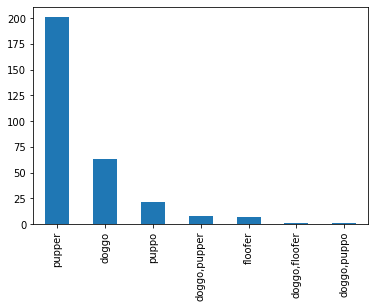

In [284]:
df.dog_stage.value_counts().plot(kind='bar')

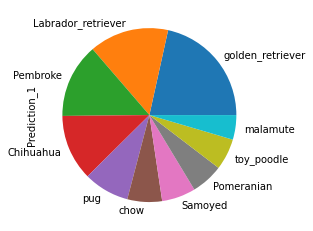

In [285]:
predication_1_counts=df2.Prediction_1.value_counts()
predication_1_counts.head(10)
predication_1_counts.head(10).plot(kind='pie');

Text(0.5, 0, 'Month')

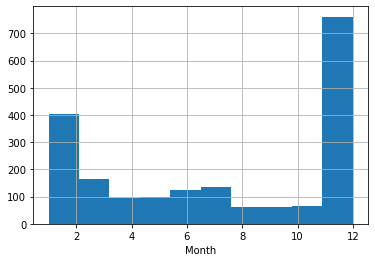

In [286]:
df['Date']=df.Date.astype('datetime64[ns]')
df['month']=df['Date'].dt.month
df['month'].hist()
plt.xlabel('Month')


In [287]:
df['Date'].dt.year.value_counts()

2016    962
2015    655
2017    354
Name: Date, dtype: int64